<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EC%86%8C%EB%B6%84%EB%A5%98_%EC%A0%84%EC%B2%B4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [34]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [16]:
# 학원 중분류에 대한 클러스터링 수행
sh = sh[sh['업종중분류']=='학원']

In [35]:
group = sh.groupby(by='업종소분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,1급호텔,0,4,656,12109332000,98825,866683107,5946160
1,2급호텔,1,2,828,9972681000,117702,732383891,5816978
2,LPG가스,113,57,9032,499281266000,8906636,4747621437,4134988
3,가구,599,398,28215,141381854000,593282,282865099,32045908
4,가구 제조,0,3,482,652177000,4124,84310634,24668029
...,...,...,...,...,...,...,...,...
357,화훼/조경,5,16,3345,3951304000,68196,85460501,4827129
358,환경측정/검사/평가서비스,4,2,214,560498000,28291,93945478,16001978
359,회계서비스,397,222,5120,17720863000,916455,111529131,14950164
360,휴게소,0,4,591,10469664000,1257253,624371025,451707


In [36]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [37]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [38]:
# 표준화 수행
cls = group.drop(columns='업종소분류')
cols = cls.columns
scaler = MinMaxScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[0.00000000e+00, 2.43664717e-04, 6.95118043e-04, ...,
        6.79166610e-04, 2.27418719e-03, 6.70227579e-03],
       [4.80584391e-05, 1.21832359e-04, 8.77652857e-04, ...,
        8.08919546e-04, 1.47738009e-03, 4.61025290e-03],
       [5.43060361e-03, 3.47222222e-03, 9.58413900e-03, ...,
        6.12205310e-02, 6.84754088e-03, 3.02368001e-03],
       ...,
       [1.90792003e-02, 1.35233918e-02, 5.43253322e-03, ...,
        6.29922769e-03, 4.11269437e-04, 9.91642644e-04],
       [0.00000000e+00, 2.43664717e-04, 6.26136863e-04, ...,
        8.64173662e-03, 2.18175327e-03, 3.82435397e-04],
       [7.20876586e-04, 1.58382066e-03, 2.77198218e-03, ...,
        2.21483526e-02, 9.83442810e-03, 3.48131866e-03]])

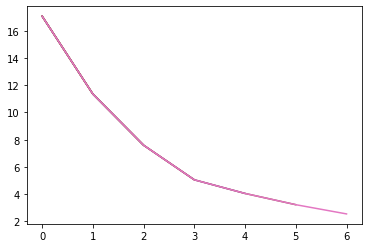

In [39]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [40]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=2)
km.fit(scaled)
km.cluster_centers_

array([[1.47116387e-02, 1.42884922e-02, 1.63219877e-02, 1.70844974e-02,
        2.20992896e-02, 1.73958823e-02, 1.05756232e-02],
       [9.66359093e-01, 9.87908138e-01, 9.02522164e-01, 2.60385894e-01,
        4.40571825e-01, 2.50233045e-04, 1.59586954e-03]])

In [41]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
# cluster.sort_values(by='카드매출금액', ascending=False, inplace=True)
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.014712,0.014288,0.016322,0.017084,0.022099,0.017396,0.010576
1,0.966359,0.987908,0.902522,0.260386,0.440572,0.000250,0.001596


In [42]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,0
1,0
2,0
3,0
4,0
...,...
356,0
357,0
358,0
359,0


In [43]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.000000,0.000244,0.000695,0.001689,0.000679,0.002274,0.006702
1,0.000048,0.000122,0.000878,0.001391,0.000809,0.001477,0.004610
2,0.005431,0.003472,0.009584,0.069643,0.061221,0.006848,0.003024
3,0.028787,0.024245,0.029942,0.019721,0.004078,0.000604,0.013109
4,0.000000,0.000183,0.000510,0.000091,0.000028,0.000149,0.008673
...,...,...,...,...,...,...,...
356,0.000240,0.000975,0.003549,0.000551,0.000469,0.000128,0.003128
357,0.000192,0.000122,0.000226,0.000078,0.000194,0.000307,0.001018
358,0.019079,0.013523,0.005433,0.002472,0.006299,0.000411,0.000992
359,0.000000,0.000244,0.000626,0.001460,0.008642,0.002182,0.000382


In [44]:
names = pd.DataFrame(group['업종소분류'])
names.reset_index(inplace=True, drop=True)
names

,업종소분류
0,1급호텔
1,2급호텔
2,LPG가스
3,가구
4,가구 제조
...,...
356,화훼/조경
357,환경측정/검사/평가서비스
358,회계서비스
359,휴게소


In [45]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,클러스터
0,0.000000,0.000244,0.000695,0.001689,0.000679,0.002274,0.006702,1급호텔,0
1,0.000048,0.000122,0.000878,0.001391,0.000809,0.001477,0.004610,2급호텔,0
2,0.005431,0.003472,0.009584,0.069643,0.061221,0.006848,0.003024,LPG가스,0
3,0.028787,0.024245,0.029942,0.019721,0.004078,0.000604,0.013109,가구,0
4,0.000000,0.000183,0.000510,0.000091,0.000028,0.000149,0.008673,가구 제조,0
...,...,...,...,...,...,...,...,...,...
356,0.000240,0.000975,0.003549,0.000551,0.000469,0.000128,0.003128,화훼/조경,0
357,0.000192,0.000122,0.000226,0.000078,0.000194,0.000307,0.001018,환경측정/검사/평가서비스,0
358,0.019079,0.013523,0.005433,0.002472,0.006299,0.000411,0.000992,회계서비스,0
359,0.000000,0.000244,0.000626,0.001460,0.008642,0.002182,0.000382,휴게소,0


In [48]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수는 작은 산업이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수가 크지만 건당, 점당매출은 작은 같은 산업들이 해당된다.
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.014712,0.014288,0.016322,0.017084,0.022099,0.017396,0.010576
1,0.966359,0.987908,0.902522,0.260386,0.440572,0.000250,0.001596


In [49]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종소분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='필수산업',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='주류산업',
      line_color=color[1]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[2],
  #     theta = categories,
  #     fill='toself',
  #     name='비주류산업',
  #     line_color=color[2]
  # ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
show_cluster(result, '학원-예체능')

341    0
Name: 클러스터, dtype: int32


In [ ]:
for col in sh['업종소분류'].unique():
  show_cluster(result, col)

305    0
Name: 클러스터, dtype: int32


3    0
Name: 클러스터, dtype: int32


145    0
Name: 클러스터, dtype: int32


260    0
Name: 클러스터, dtype: int32


317    0
Name: 클러스터, dtype: int32


326    0
Name: 클러스터, dtype: int32


360    0
Name: 클러스터, dtype: int32


18    0
Name: 클러스터, dtype: int32


251    0
Name: 클러스터, dtype: int32


331    0
Name: 클러스터, dtype: int32


31    0
Name: 클러스터, dtype: int32


40    0
Name: 클러스터, dtype: int32


4    0
Name: 클러스터, dtype: int32


43    0
Name: 클러스터, dtype: int32


51    0
Name: 클러스터, dtype: int32


129    0
Name: 클러스터, dtype: int32


89    0
Name: 클러스터, dtype: int32


134    0
Name: 클러스터, dtype: int32


337    0
Name: 클러스터, dtype: int32


158    0
Name: 클러스터, dtype: int32


234    0
Name: 클러스터, dtype: int32


252    0
Name: 클러스터, dtype: int32


314    0
Name: 클러스터, dtype: int32


160    0
Name: 클러스터, dtype: int32


162    0
Name: 클러스터, dtype: int32


345    0
Name: 클러스터, dtype: int32


34    0
Name: 클러스터, dtype: int32


50    0
Name: 클러스터, dtype: int32


195    0
Name: 클러스터, dtype: int32


241    0
Name: 클러스터, dtype: int32


242    0
Name: 클러스터, dtype: int32


244    0
Name: 클러스터, dtype: int32


344    0
Name: 클러스터, dtype: int32


171    0
Name: 클러스터, dtype: int32


190    0
Name: 클러스터, dtype: int32


221    0
Name: 클러스터, dtype: int32


290    0
Name: 클러스터, dtype: int32


8    0
Name: 클러스터, dtype: int32


216    0
Name: 클러스터, dtype: int32


269    0
Name: 클러스터, dtype: int32


277    0
Name: 클러스터, dtype: int32


37    0
Name: 클러스터, dtype: int32


275    0
Name: 클러스터, dtype: int32


286    0
Name: 클러스터, dtype: int32


262    0
Name: 클러스터, dtype: int32


312    0
Name: 클러스터, dtype: int32


316    0
Name: 클러스터, dtype: int32


6    0
Name: 클러스터, dtype: int32


184    0
Name: 클러스터, dtype: int32


189    0
Name: 클러스터, dtype: int32


201    0
Name: 클러스터, dtype: int32


355    0
Name: 클러스터, dtype: int32


106    0
Name: 클러스터, dtype: int32


107    0
Name: 클러스터, dtype: int32


108    0
Name: 클러스터, dtype: int32


111    0
Name: 클러스터, dtype: int32


112    0
Name: 클러스터, dtype: int32


113    0
Name: 클러스터, dtype: int32


114    0
Name: 클러스터, dtype: int32


115    0
Name: 클러스터, dtype: int32


116    0
Name: 클러스터, dtype: int32


117    0
Name: 클러스터, dtype: int32


118    0
Name: 클러스터, dtype: int32


119    0
Name: 클러스터, dtype: int32


120    0
Name: 클러스터, dtype: int32


121    0
Name: 클러스터, dtype: int32


122    0
Name: 클러스터, dtype: int32


123    0
Name: 클러스터, dtype: int32


124    0
Name: 클러스터, dtype: int32


125    0
Name: 클러스터, dtype: int32


126    0
Name: 클러스터, dtype: int32


20    0
Name: 클러스터, dtype: int32


69    0
Name: 클러스터, dtype: int32


75    0
Name: 클러스터, dtype: int32


207    0
Name: 클러스터, dtype: int32


211    0
Name: 클러스터, dtype: int32


237    0
Name: 클러스터, dtype: int32


295    0
Name: 클러스터, dtype: int32


302    0
Name: 클러스터, dtype: int32


39    0
Name: 클러스터, dtype: int32


60    0
Name: 클러스터, dtype: int32


154    0
Name: 클러스터, dtype: int32


167    0
Name: 클러스터, dtype: int32


191    0
Name: 클러스터, dtype: int32


229    0
Name: 클러스터, dtype: int32


109    0
Name: 클러스터, dtype: int32


128    0
Name: 클러스터, dtype: int32


92    0
Name: 클러스터, dtype: int32


138    0
Name: 클러스터, dtype: int32


139    0
Name: 클러스터, dtype: int32


140    0
Name: 클러스터, dtype: int32


19    0
Name: 클러스터, dtype: int32


194    0
Name: 클러스터, dtype: int32


49    0
Name: 클러스터, dtype: int32


152    0
Name: 클러스터, dtype: int32


267    0
Name: 클러스터, dtype: int32


62    0
Name: 클러스터, dtype: int32


153    0
Name: 클러스터, dtype: int32


203    0
Name: 클러스터, dtype: int32


276    0
Name: 클러스터, dtype: int32


218    0
Name: 클러스터, dtype: int32


219    0
Name: 클러스터, dtype: int32


220    0
Name: 클러스터, dtype: int32


352    0
Name: 클러스터, dtype: int32


68    0
Name: 클러스터, dtype: int32


227    0
Name: 클러스터, dtype: int32


239    0
Name: 클러스터, dtype: int32


310    0
Name: 클러스터, dtype: int32


130    0
Name: 클러스터, dtype: int32


163    0
Name: 클러스터, dtype: int32


199    0
Name: 클러스터, dtype: int32


240    0
Name: 클러스터, dtype: int32


309    0
Name: 클러스터, dtype: int32


33    0
Name: 클러스터, dtype: int32


41    0
Name: 클러스터, dtype: int32


215    0
Name: 클러스터, dtype: int32


248    0
Name: 클러스터, dtype: int32


272    0
Name: 클러스터, dtype: int32


306    0
Name: 클러스터, dtype: int32


150    0
Name: 클러스터, dtype: int32


151    0
Name: 클러스터, dtype: int32
